# Assignment - Machine Learning PGD - Support Vector Machine (SVM)
### Pulsar Data from Kaggle

In [2]:
# Importing the basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
# As we have two different files of Train data and test data therefore two diff data sets have been loaded
df_test = pd.read_csv("pulsar_data_test.csv")
df_train = pd.read_csv("pulsar_data_train.csv")

In [12]:
df_test.info()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


(5370, 9)

In [14]:
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


(12528, 9)

In [16]:
# In order to fill the null values we need to concanate two files as one
df=pd.concat([df_train,df_test],ignore_index=True)

In [18]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


(17898, 9)

In [20]:
# remove leading spaces from column names
df.columns=df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [38]:
# rename column names

df.columns=['Mean_IP','SD_IP','Kurtosis_IP','Skewness_IP','Mean_DM_SNR','SD_DM_SNR','Kurtosis_DM-SNR','Skewness_DM-SNR','Target_class']
df.columns

Index(['Mean_IP', 'SD_IP', 'Kurtosis_IP', 'Skewness_IP', 'Mean_DM_SNR',
       'SD_DM_SNR', 'Kurtosis_DM-SNR', 'Skewness_DM-SNR', 'Target_class'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean_IP          17898 non-null  float64
 1   SD_IP            17898 non-null  float64
 2   Kurtosis_IP      15396 non-null  float64
 3   Skewness_IP      17898 non-null  float64
 4   Mean_DM_SNR      17898 non-null  float64
 5   SD_DM_SNR        16196 non-null  float64
 6   Kurtosis_DM-SNR  17898 non-null  float64
 7   Skewness_DM-SNR  17029 non-null  float64
 8   Target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


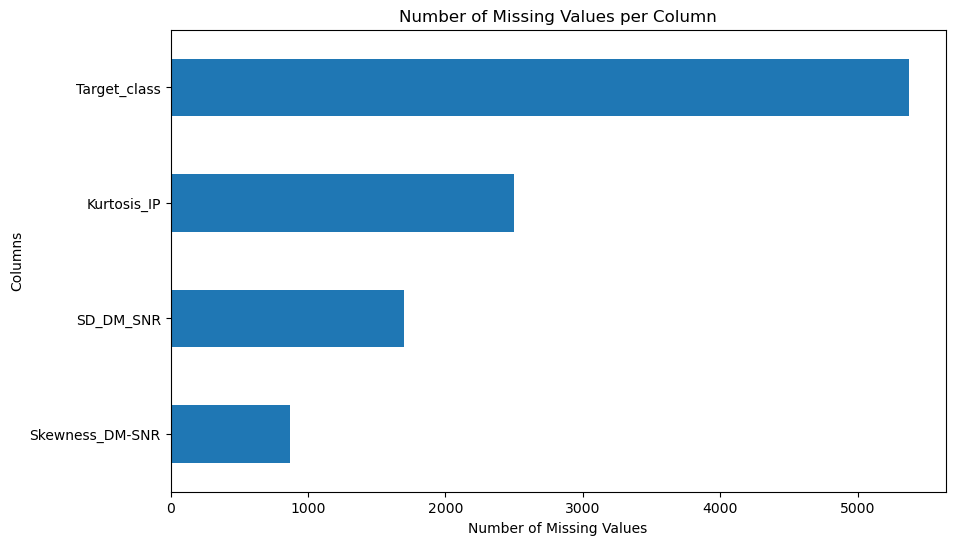

In [42]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values as a bar chart
missing_values.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Number of Missing Values per Column")
plt.xlabel("Number of Missing Values")
plt.ylabel("Columns")
plt.show()

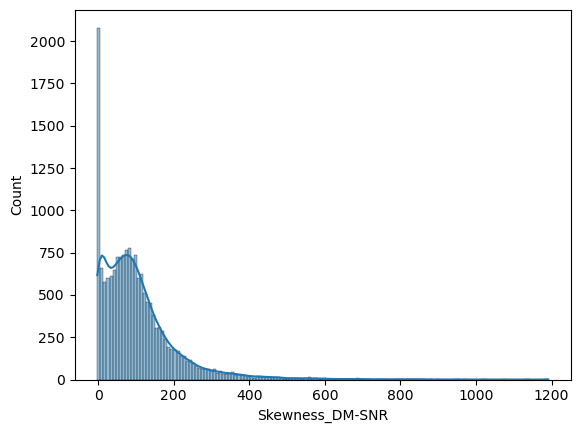

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Skewness_DM-SNR'], kde=True)
plt.show()

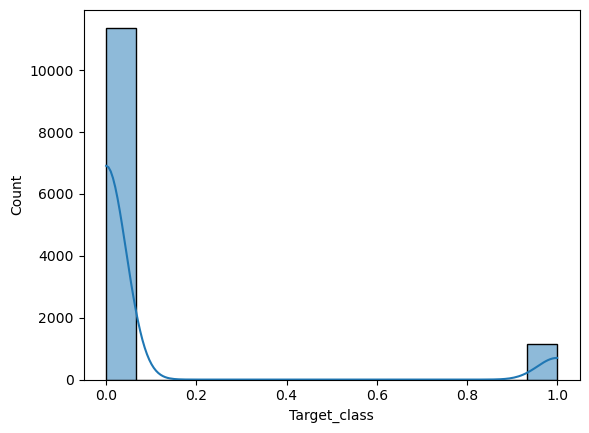

In [46]:
sns.histplot(df['Target_class'], kde=True)
plt.show()

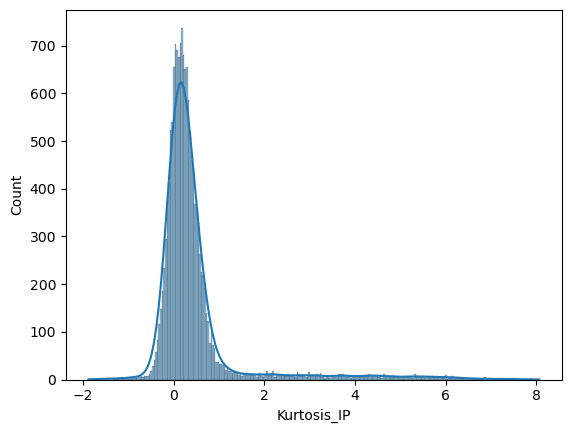

In [48]:

sns.histplot(df['Kurtosis_IP'], kde=True)
plt.show()

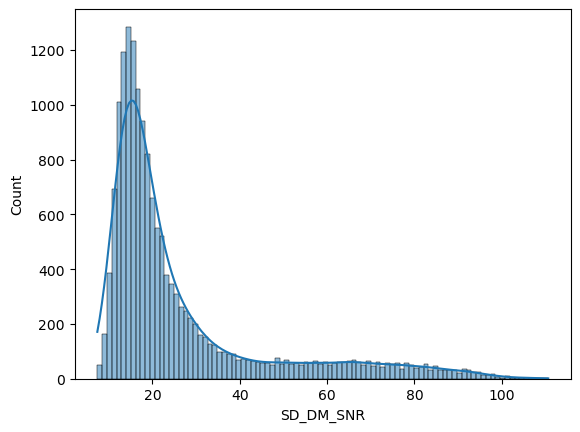

In [52]:
sns.histplot(df['SD_DM_SNR'], kde=True)
plt.show()

# Filling Missing Values

#### 1 - Target_Class

In [78]:
df.Target_class.unique()

array([ 0.,  1., nan])

In [80]:
df.Target_class.value_counts()

Target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

In [106]:
# After seeing the visual of the plot of Traget Class it is suggested that mode is the best to be use to fill in the missing values
df['Target_class'] = df['Target_class'].fillna(df['Target_class'].mode()[0])

In [108]:
df.Target_class.unique()

array([0., 1.])

In [110]:
df.Target_class.value_counts()

Target_class
0.0    16745
1.0     1153
Name: count, dtype: int64

#### 2-'Skewness_DM-SNR'

In [117]:
df['Skewness_DM-SNR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17898 entries, 0 to 17897
Series name: Skewness_DM-SNR
Non-Null Count  Dtype  
--------------  -----  
17029 non-null  float64
dtypes: float64(1)
memory usage: 140.0 KB


In [126]:
# After seeing the visual of the skewed plot of 'Skewness_DM-SNR' it is suggested that median is the best to be use to fill in the missing values
df['Skewness_DM-SNR'] = df['Skewness_DM-SNR'].fillna(df['Skewness_DM-SNR'].median())

In [121]:
df['Skewness_DM-SNR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17898 entries, 0 to 17897
Series name: Skewness_DM-SNR
Non-Null Count  Dtype  
--------------  -----  
17898 non-null  float64
dtypes: float64(1)
memory usage: 140.0 KB


#### 3- Kurtosis_IP

In [124]:
df['Kurtosis_IP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17898 entries, 0 to 17897
Series name: Kurtosis_IP
Non-Null Count  Dtype  
--------------  -----  
15396 non-null  float64
dtypes: float64(1)
memory usage: 140.0 KB


In [128]:
# After seeing the visual of the skewed plot of 'Kurtosis_IP' it is suggested that median is the best to be use to fill in the missing values
df['Kurtosis_IP'] = df['Kurtosis_IP'].fillna(df['Kurtosis_IP'].median())

In [130]:
df['Kurtosis_IP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17898 entries, 0 to 17897
Series name: Kurtosis_IP
Non-Null Count  Dtype  
--------------  -----  
17898 non-null  float64
dtypes: float64(1)
memory usage: 140.0 KB


#### 4-SD_DM_SNR  

In [133]:
df['SD_DM_SNR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17898 entries, 0 to 17897
Series name: SD_DM_SNR
Non-Null Count  Dtype  
--------------  -----  
16196 non-null  float64
dtypes: float64(1)
memory usage: 140.0 KB


In [135]:
# After seeing the visual of the skewed plot of 'SD_DM_SNR' it is suggested that median is the best to be use to fill in the missing values
df['SD_DM_SNR'] = df['SD_DM_SNR'].fillna(df['SD_DM_SNR'].median())

In [137]:
df['SD_DM_SNR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17898 entries, 0 to 17897
Series name: SD_DM_SNR
Non-Null Count  Dtype  
--------------  -----  
17898 non-null  float64
dtypes: float64(1)
memory usage: 140.0 KB


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean_IP          17898 non-null  float64
 1   SD_IP            17898 non-null  float64
 2   Kurtosis_IP      17898 non-null  float64
 3   Skewness_IP      17898 non-null  float64
 4   Mean_DM_SNR      17898 non-null  float64
 5   SD_DM_SNR        17898 non-null  float64
 6   Kurtosis_DM-SNR  17898 non-null  float64
 7   Skewness_DM-SNR  17898 non-null  float64
 8   Target_class     17898 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [141]:
df

,Mean_IP,SD_IP,Kurtosis_IP,Skewness_IP,Mean_DM_SNR,SD_DM_SNR,Kurtosis_DM-SNR,Skewness_DM-SNR,Target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,18.457026,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,0.0
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,0.0
17895,136.171875,48.924385,0.224414,0.063227,2.810201,18.695230,7.848577,69.388978,0.0
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,0.0


# Standardization

In [154]:
#Splitting X and Y
X = df.iloc[:,0:8]
y= df.iloc[:,8:]

In [156]:
y

,Target_class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17893,0.0
17894,0.0
17895,0.0
17896,0.0


In [158]:
X

,Mean_IP,SD_IP,Kurtosis_IP,Skewness_IP,Mean_DM_SNR,SD_DM_SNR,Kurtosis_DM-SNR,Skewness_DM-SNR
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,18.457026,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028
17895,136.171875,48.924385,0.224414,0.063227,2.810201,18.695230,7.848577,69.388978
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616


In [160]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [162]:
X = sc.fit_transform(X)

In [164]:
X

array([[ 0.39280351,  0.26646793, -0.06921749, ..., -0.38545828,
        -0.18945593, -0.36985723],
       [-1.32975704, -1.51599848,  0.26996713, ..., -0.42967497,
         0.24658334, -0.00900108],
       [ 0.76040086,  0.97618058, -0.31256477, ..., -0.17391143,
         0.04545256, -0.28462794],
       ...,
       [ 0.97815736,  0.34704869, -0.22108162, ..., -0.36966568,
        -0.10097271, -0.32922472],
       [-0.17854083,  0.36776144, -0.19964098, ..., -0.54462063,
         0.15634484, -0.03162788],
       [-0.01560414, -1.21246414,  0.0156783 , ..., -0.18249241,
        -0.52459536, -0.61365071]])

# Splitting Train and Test Data

In [167]:
new_df_Train = df.iloc[0:12528]
new_df_Test = df.iloc[12528:17898]

# Applying SVM Model

In [170]:
new_df_Train

,Mean_IP,SD_IP,Kurtosis_IP,Skewness_IP,Mean_DM_SNR,SD_DM_SNR,Kurtosis_DM-SNR,Skewness_DM-SNR,Target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,18.457026,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,18.457026,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [172]:
X_new_train = new_df_Train.iloc[:,0:8]

In [174]:
y_new_train = new_df_Train.iloc[:,8:]

In [176]:
y_new_train 

,Target_class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
12523,0.0
12524,0.0
12525,0.0
12526,0.0


In [178]:
X_new_train

,Mean_IP,SD_IP,Kurtosis_IP,Skewness_IP,Mean_DM_SNR,SD_DM_SNR,Kurtosis_DM-SNR,Skewness_DM-SNR
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,18.457026,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143
12524,115.617188,46.784600,0.218177,0.226757,6.140468,18.457026,5.732201,34.357283
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018


In [182]:
new_df_Test

,Mean_IP,SD_IP,Kurtosis_IP,Skewness_IP,Mean_DM_SNR,SD_DM_SNR,Kurtosis_DM-SNR,Skewness_DM-SNR,Target_class
12528,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,0.0
12529,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,0.0
12530,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,0.0
12531,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,0.0
12532,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,0.0
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,0.0
17895,136.171875,48.924385,0.224414,0.063227,2.810201,18.695230,7.848577,69.388978,0.0
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,0.0


In [184]:
X_new_test = new_df_Test.iloc[:,0:8]

In [186]:
y_new_test = new_df_Test.iloc[:,8:]

In [188]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_new_train)
X_test= sc.fit_transform(X_new_test)

In [190]:
from sklearn.svm import SVC
model = SVC()

In [192]:
model.fit(X_train, y_new_train)

SVC()

In [194]:
y_pred = model.predict(X_test)

In [196]:
model.score(X_test, y_new_test)

0.9229050279329609

In [200]:
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_new_test, y_pred))
print(classification_report(y_new_test, y_pred))

[[4956  414]
 [   0    0]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      5370
         1.0       0.00      0.00      0.00         0

    accuracy                           0.92      5370
   macro avg       0.50      0.46      0.48      5370
weighted avg       1.00      0.92      0.96      5370



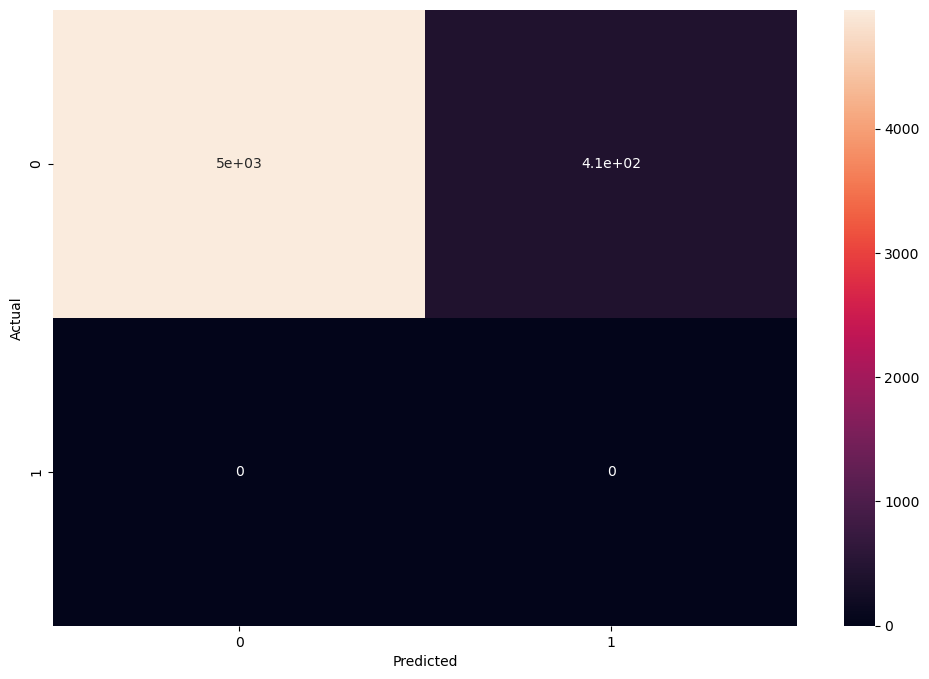

In [202]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_new_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Fine Tuning of Model

#### 1 - Value of C

In [205]:
model_C = SVC(C=5)
model_C.fit(X_train, y_new_train)
model_C.score(X_test, y_new_test)

0.9208566108007449

In [219]:
model_C = SVC(C=1)
model_C.fit(X_train, y_new_train)
model_C.score(X_test, y_new_test)

0.9229050279329609

In [221]:
model_C = SVC(C=20)
model_C.fit(X_train, y_new_train)
model_C.score(X_test, y_new_test)

0.9182495344506517

#### 2- Value of Gamma

In [224]:
model_g = SVC(gamma=3)
model_g.fit(X_train, y_new_train)
model_g.score(X_test, y_new_test)

0.9333333333333333

In [226]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_new_train)
model_g.score(X_test, y_new_test)

0.9811918063314712

In [228]:
model_g = SVC(gamma=15)
model_g.fit(X_train, y_new_train)
model_g.score(X_test, y_new_test)

0.9960893854748604

In [230]:
model_g = SVC(gamma=20)  # Best Value of Gamma
model_g.fit(X_train, y_new_train)
model_g.score(X_test, y_new_test)

0.9990689013035382

In [232]:
model_g = SVC(gamma=25)
model_g.fit(X_train, y_new_train)
model_g.score(X_test, y_new_test)

0.9998137802607077

#### 3- Value of Kernal

In [235]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_new_train)
model_linear_kernal.score(X_test, y_new_test)

0.9258845437616388

In [239]:
model_linear_kernal = SVC(kernel='rbf')
model_linear_kernal.fit(X_train, y_new_train)
model_linear_kernal.score(X_test, y_new_test)


0.9229050279329609

## Best Model Values
#### C=1, gamma = 20, Kernal = linear
#### C=1, gamma = 20, Kernal = rbf

In [244]:
model_linear_kernal = SVC(kernel='rbf', C=1, gamma=20)
model_linear_kernal.fit(X_train, y_new_train)
model_linear_kernal.score(X_test, y_new_test)

0.9990689013035382

In [245]:
model_linear_kernal = SVC(kernel='linear', C=1, gamma=20)
model_linear_kernal.fit(X_train, y_new_train)
model_linear_kernal.score(X_test, y_new_test)

0.9258845437616388